In [1]:
from pathlib import Path
import scipy
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.stats as stats
from scipy.interpolate import InterpolatedUnivariateSpline, BSpline, CubicSpline, make_lsq_spline, make_interp_spline

In [2]:
file = "../data/SSCURVES(1-61).xlsx"

  3%|██                                                              | 2/63 [00:00<00:03, 16.25it/s]/tmp/ipykernel_3976754/2937884073.py:14: RuntimeWarning: divide by zero encountered in divide
  dxdy = np.diff(df['Strain']) / np.diff(df['Stress'])
/tmp/ipykernel_3976754/2937884073.py:14: RuntimeWarning: divide by zero encountered in divide
  dxdy = np.diff(df['Strain']) / np.diff(df['Stress'])
  6%|████                                                            | 4/63 [00:00<00:03, 16.87it/s]/tmp/ipykernel_3976754/2937884073.py:14: RuntimeWarning: divide by zero encountered in divide
  dxdy = np.diff(df['Strain']) / np.diff(df['Stress'])
/tmp/ipykernel_3976754/2937884073.py:14: RuntimeWarning: divide by zero encountered in divide
  dxdy = np.diff(df['Strain']) / np.diff(df['Stress'])
 10%|██████                                                          | 6/63 [00:00<00:03, 17.12it/s]/tmp/ipykernel_3976754/2937884073.py:14: RuntimeWarning: divide by zero encountered in divide
  dxdy = n

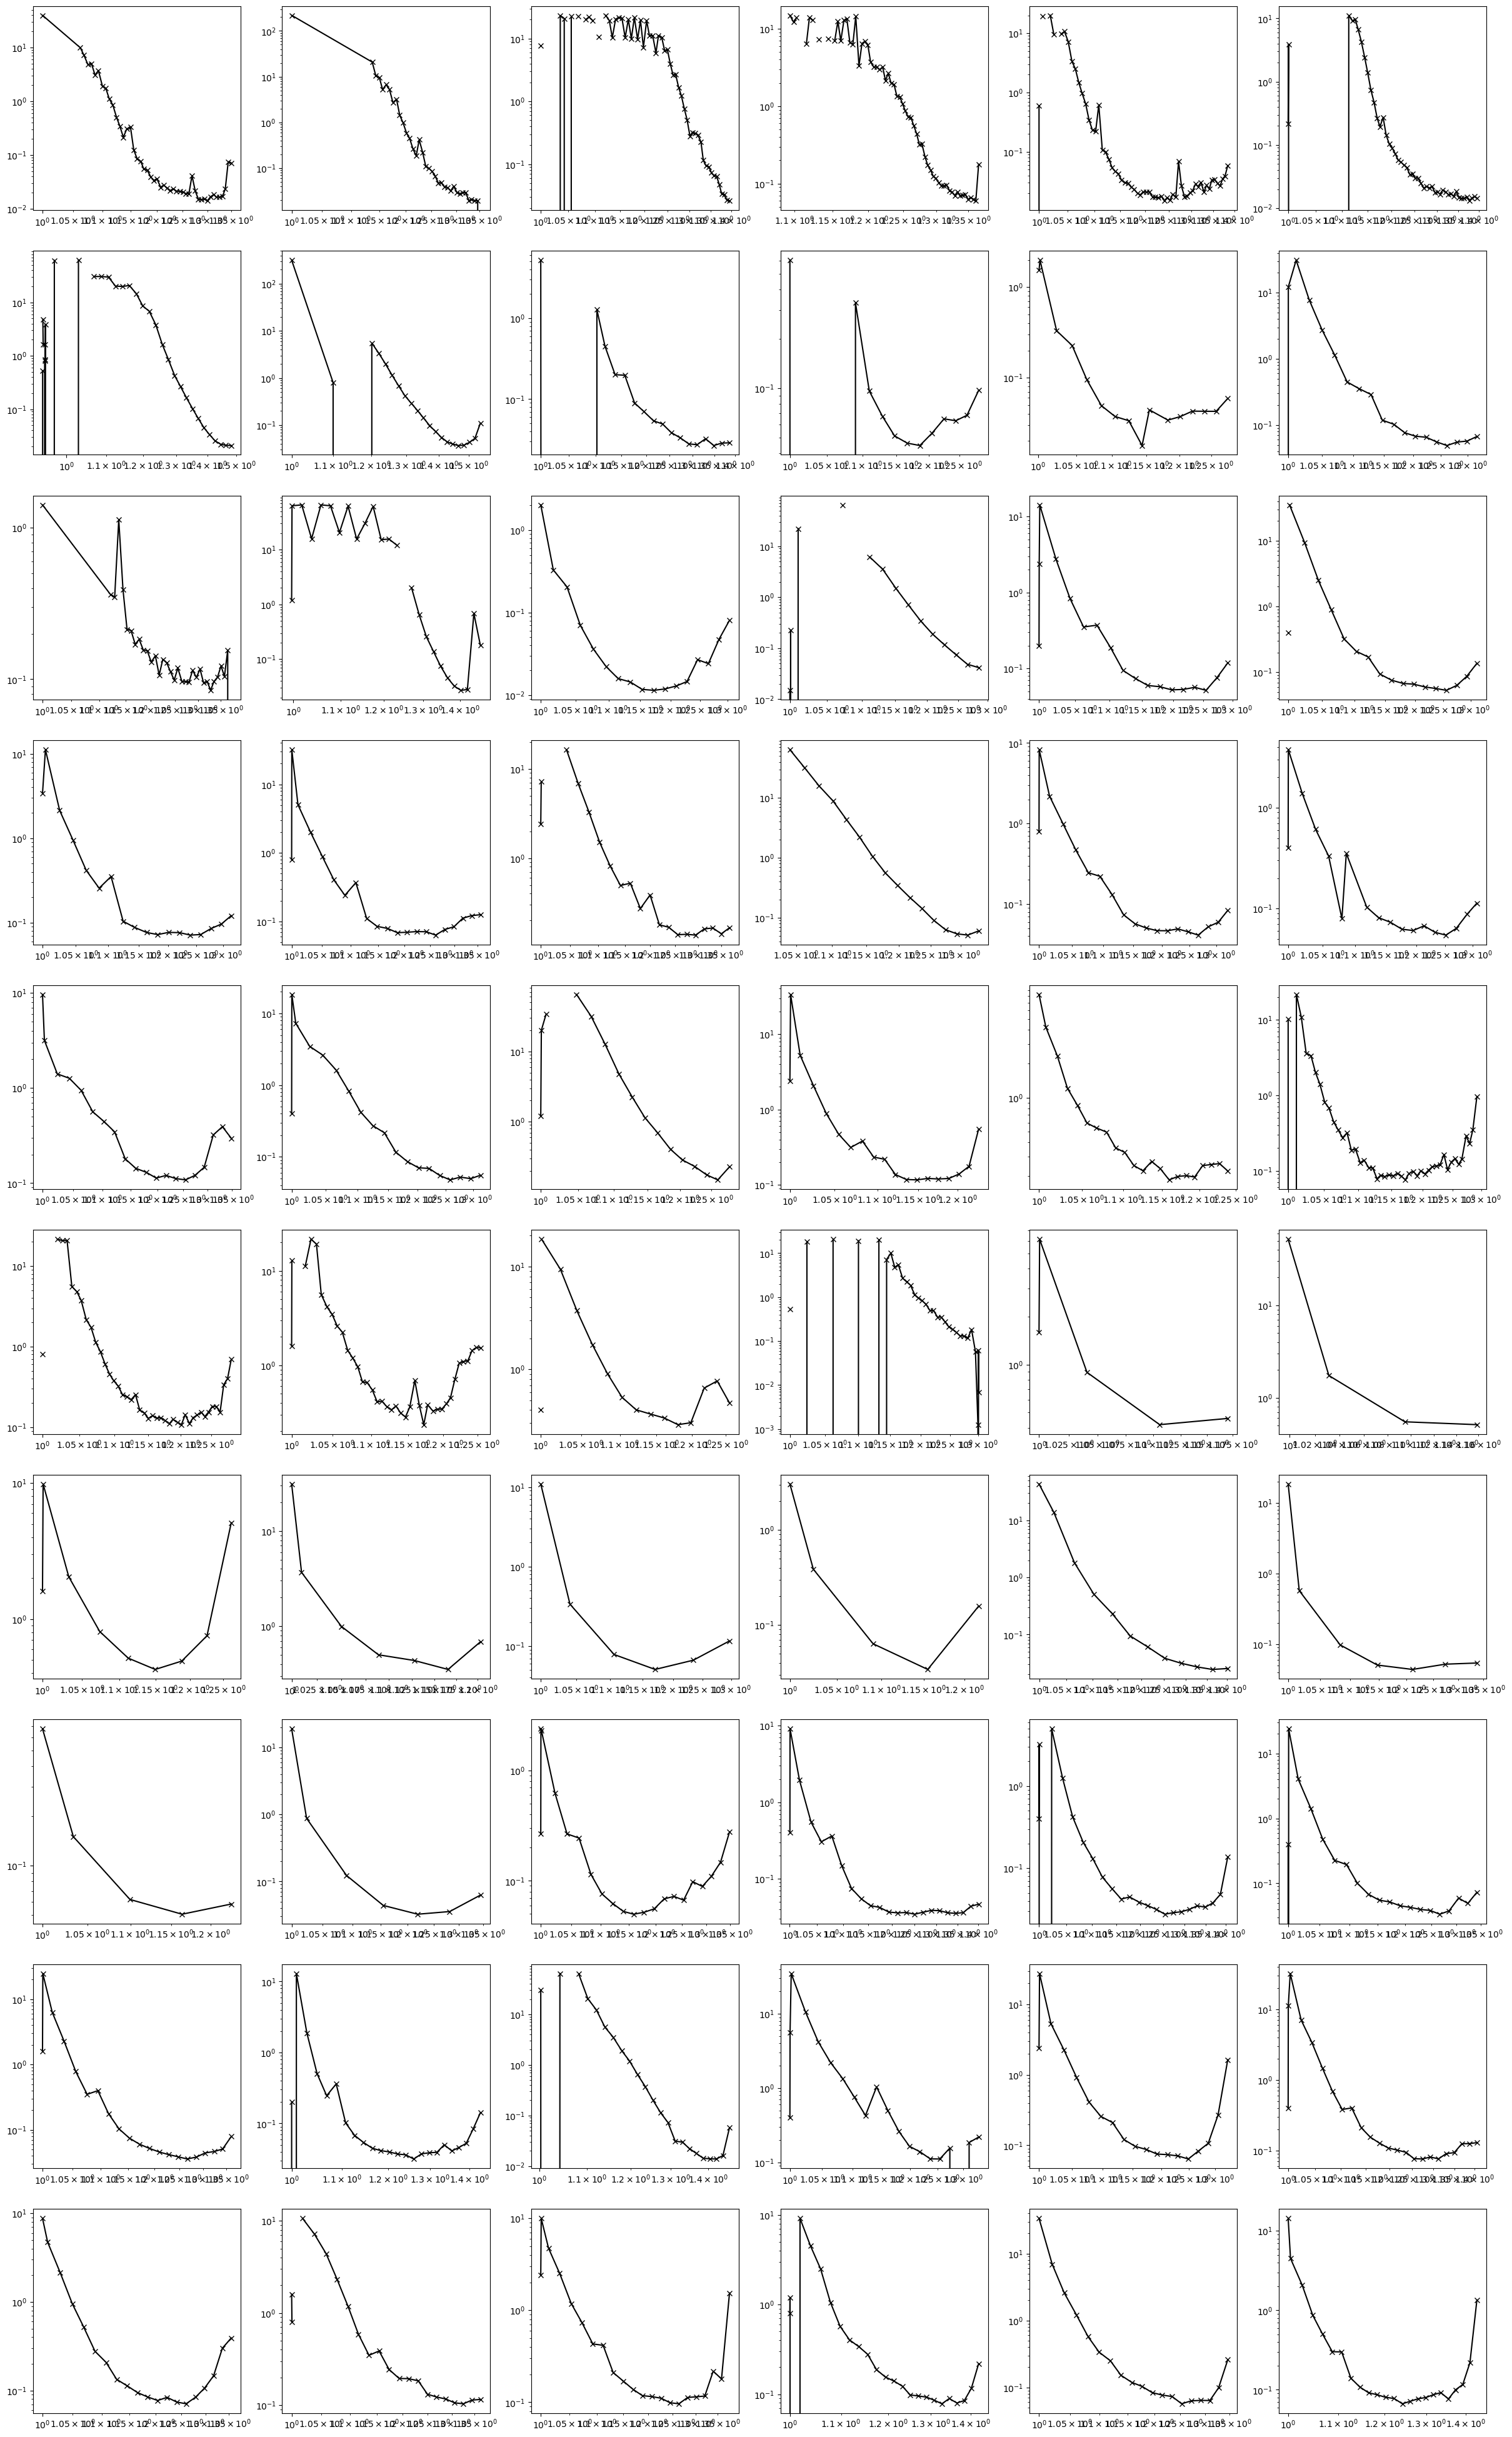

In [17]:
xls = pd.ExcelFile(file)

fig, axs = plt.subplots(10, 6, figsize=(30,50))


for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.groupby('Strain', as_index=False).agg('mean')

    x_data = df['Strain']
    y_data = df['Stress']

    # dydx = np.diff(df['Stress']) / np.diff(df['Strain'])
    dxdy = np.diff(df['Strain']) / np.diff(df['Stress'])

    ax.loglog(x_data[:-1], dxdy, marker='x', color='black')
plt.show()
